# Summary

This notebook compares two experiments on a chip with eight quarter-wave CPW resonators. The metal is 30 nm aluminum. In the first experiment, the chip is in a QC-10 dark package and data was taken at about 140 mk. (One of the package screws has a small hole for a fiber optic cable.) In the second experiment, the same package is surrounded by an "armadillo shell" of Metglas (possibly 2714A) on top of aluminum tape; data was taken at 175 mK.

The internal quality factors were $2 \times 10^3$ to $2 \times 10^4$ in both experiments. The Metglas seemed to have no effect: $Q_i$ was the same or slightly lower in the second experiment, and one low-Q resonance nearly vanished.

In [34]:
from glob import glob
import pandas as pd
from kid_readout.analysis import resonator, plot_resonator
from notebooks.library import display
display.hide_code()

In [2]:
def load_s2p_re_im(filename):
    f_GHz, S11RE, S11IM, S21RE, S21IM, S12RE, S12IM, S22RE, S22IM = np.loadtxt(filename, unpack=True, skiprows=23)
    
    df = pd.DataFrame.from_dict({'f': 1e9 * f_GHz,
                                 's11': S11RE + 1j * S11IM,
                                 's21': S21RE + 1j * S21IM,
                                 's12': S12RE + 1j * S12IM,
                                 's22': S22RE + 1j * S22IM})
    return df

In [3]:
c15_directory = '/Users/daniel/Johnson+Miller/mkid/multichroic/starcryo/160105/cooldown_2016-01-15/'
c29_directory = '/Users/daniel/Johnson+Miller/mkid/multichroic/starcryo/160105/cooldown_2016-01-29/'

In [4]:
no_mg = [load_s2p_re_im(f) for f in glob(c15_directory + '2016-01-19_????_MHz.s2p')]
mg_195 = [load_s2p_re_im(f) for f in glob(c29_directory + '2016-02-01_????_MHz_195_mK.s2p')]
mg_175 = [load_s2p_re_im(f) for f in glob(c29_directory + '2016-02-01_????_MHz_175_mK.s2p')]

In [5]:
def fit_resonators(dfs, offset=0.4e-3):
    rs = []
    for df in dfs:
        f_center = df.f.mean()
        mask = np.array((f_center * (1 - offset) < df.f) & (df.f < f_center * (1 + offset)))
        rs.append(resonator.Resonator(np.array(df.f), np.array(df.s21), mask=mask))
    return rs

In [6]:
rs_no_mg = fit_resonators(no_mg)
rs_mg_195 = fit_resonators(mg_195)
rs_mg_175 = fit_resonators(mg_175)

In [7]:
no_mg_color = 'brown'
mg_color = 'green'

# Raw sweeps: bare package vs. Metglas

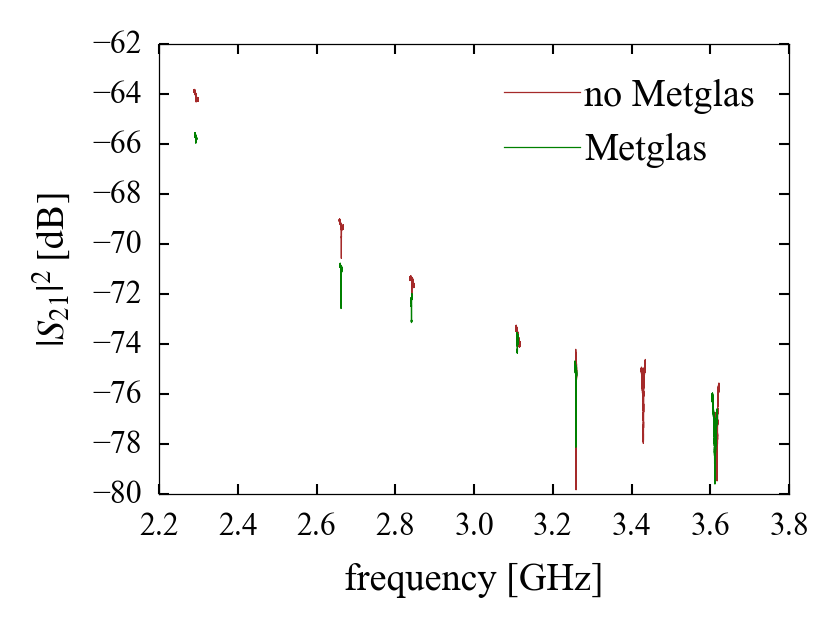

In [35]:
fig, ax = plt.subplots()

for df in no_mg:
    ax.plot(1e-9 * df.f,
            20 * np.log10(np.abs(df.s21)),
            color=no_mg_color, )
    
for df in mg_175:
    ax.plot(1e-9 * df.f,
            20 * np.log10(np.abs(df.s21)),
            color=mg_color)

handles, labels = ax.get_legend_handles_labels()
ax.legend((handles[0], handles[len(no_mg)]), ('no Metglas', 'Metglas'), loc='best')

ax.set_xlabel('frequency [GHz]')
ax.set_ylabel(r'$|S_{21}|^2 \; [\mathrm{dB}]$');

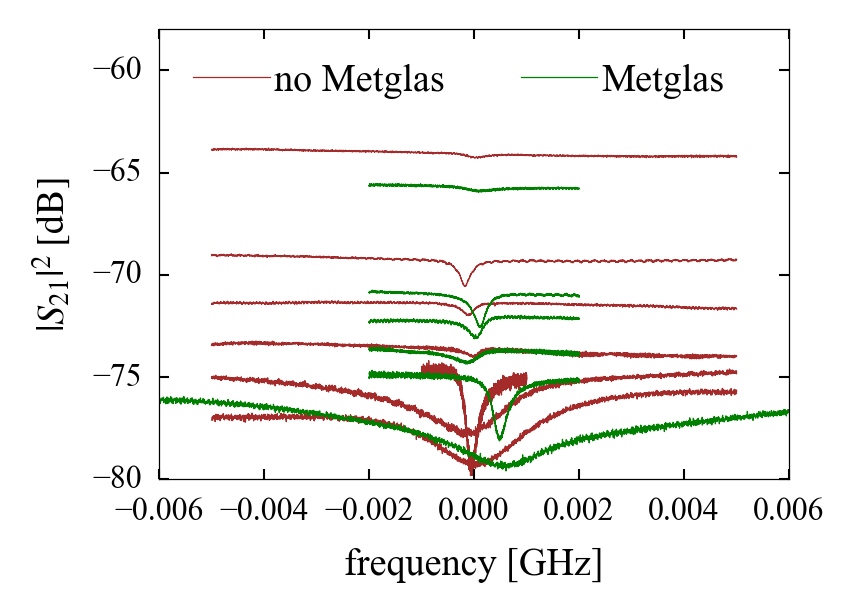

In [33]:
fig, ax = plt.subplots()

for df in no_mg:
    ax.plot(1e-9 * (df.f - df.f.mean()),
            20 * np.log10(np.abs(df.s21)),
            color=no_mg_color)

for df in mg_175:
    ax.plot(1e-9 * (df.f - df.f.mean()),
            20 * np.log10(np.abs(df.s21)),
            color=mg_color)


handles, labels = ax.get_legend_handles_labels()
ax.legend((handles[0], handles[len(no_mg)]), ('no Metglas', 'Metglas'), loc='upper left', ncol=2)

ax.set_ylim(-80, -58)
ax.set_xlabel('frequency [GHz]')
ax.set_ylabel(r'$|S_{21}|^2 \; [\mathrm{dB}]$');

# Quality factors

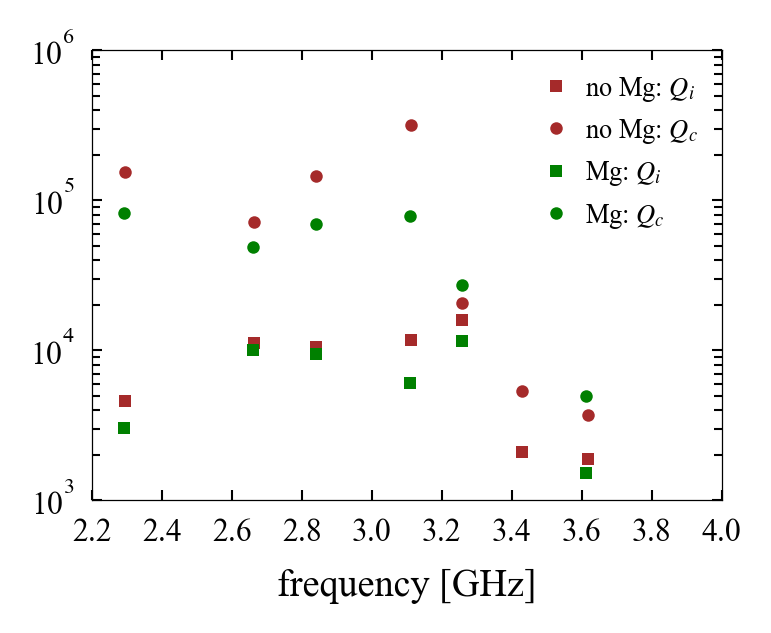

In [31]:
fig, ax = plt.subplots()

ax.plot([1e-9 * r.f_0 for r in rs_no_mg],
        [r.Q_i for r in rs_no_mg],
        color=no_mg_color,
        marker='s', markeredgecolor='none', linestyle='none', label='no Mg: $Q_i$')

ax.plot([1e-9 * r.f_0 for r in rs_no_mg],
        [r.Q_e_real for r in rs_no_mg],
        color=no_mg_color,
        marker='o', markeredgecolor='none', linestyle='none', label='no Mg: $Q_c$')

ax.plot([1e-9 * r.f_0 for r in rs_mg_175],
        [r.Q_i for r in rs_mg_175],
        color=mg_color,
        marker='s', markeredgecolor='none', linestyle='none', label='Mg: $Q_i$')

ax.plot([1e-9 * r.f_0 for r in rs_mg_175],
        [r.Q_e_real for r in rs_mg_175],
        color=mg_color,
        marker='o', markeredgecolor='none', linestyle='none', label='Mg: $Q_c$')

ax.set_xlim(2.2, 4.0)
ax.set_yscale('log')
ax.set_xlabel('frequency [GHz]')
ax.legend(loc='best', fontsize='xx-small');


# Disappearing resonance

The internal quality factor of this resonance was about $2 \times 10^3$ in the unshielded experiment.

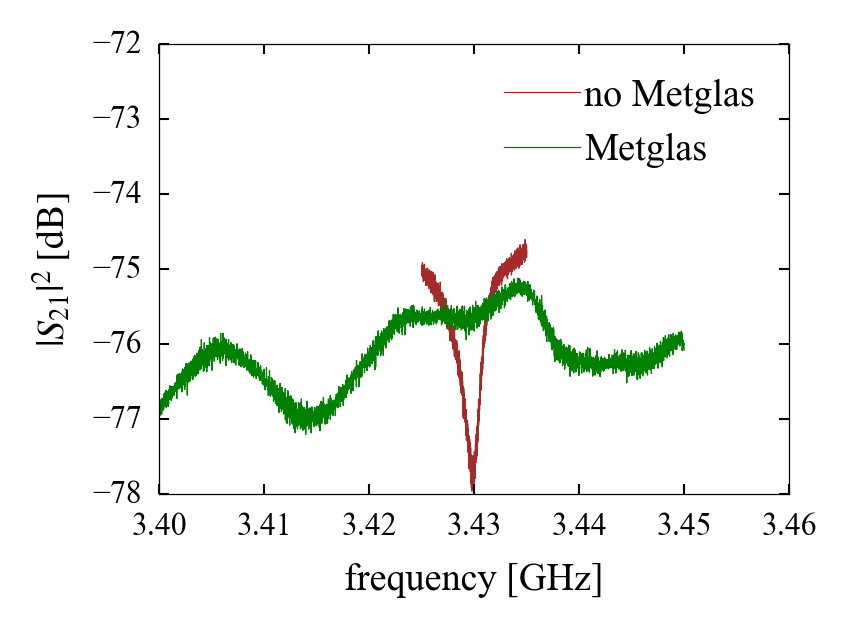

In [30]:
fig, ax = plt.subplots()

ax.plot(1e-9 * no_mg[-2].f,
        20 * np.log10(np.abs(no_mg[-2].s21)),
        color=no_mg_color, label='no Metglas')

#hello = load_s2p_re_im(c15_directory + '2016-01-19_3500_MHz_broad.s2p')
#ax.plot(hello.f, 20 * np.log10(np.abs(hello.s21)), color=no_mg_color)

#nothing_3375 = load_s2p_re_im(c29_directory + '2016-02-01_3375_MHz_175_mK_nothing.s2p')
nothing_3425 = load_s2p_re_im(c29_directory + '2016-02-01_3425_MHz_175_mK_nothing.s2p')
#ax.plot(nothing_3375.f, 20 * np.log10(np.abs(nothing_3375.s21)),
#        color=mg_color)
ax.plot(1e-9 * nothing_3425.f,
        20 * np.log10(np.abs(nothing_3425.s21)),
        color=mg_color, label='Metglas')

ax.legend(loc='best')
ax.set_ylim(-78, -72)
ax.set_xlabel('frequency [GHz]')
ax.set_ylabel(r'$|S_{21}|^2 \; [\mathrm{dB}]$');

# Resonator fits: no Metglas

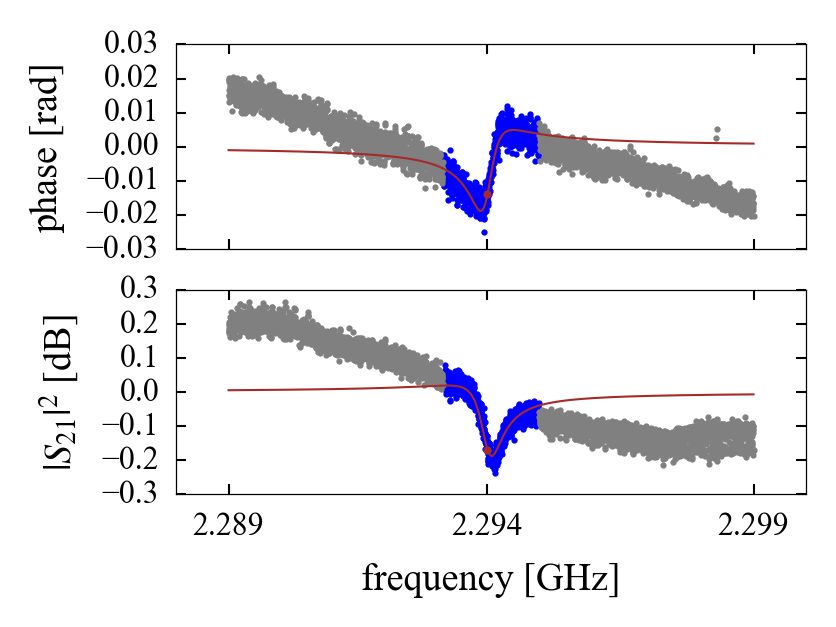

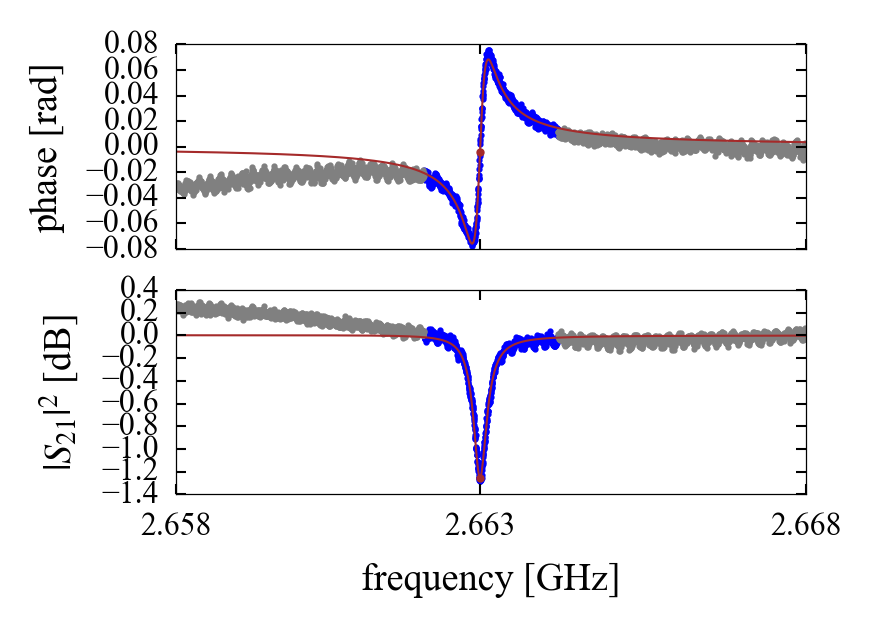

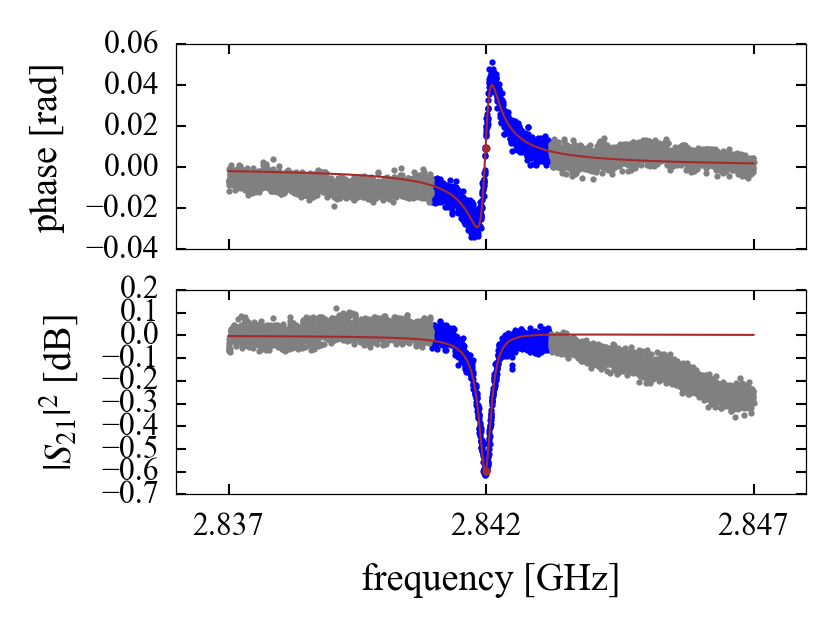

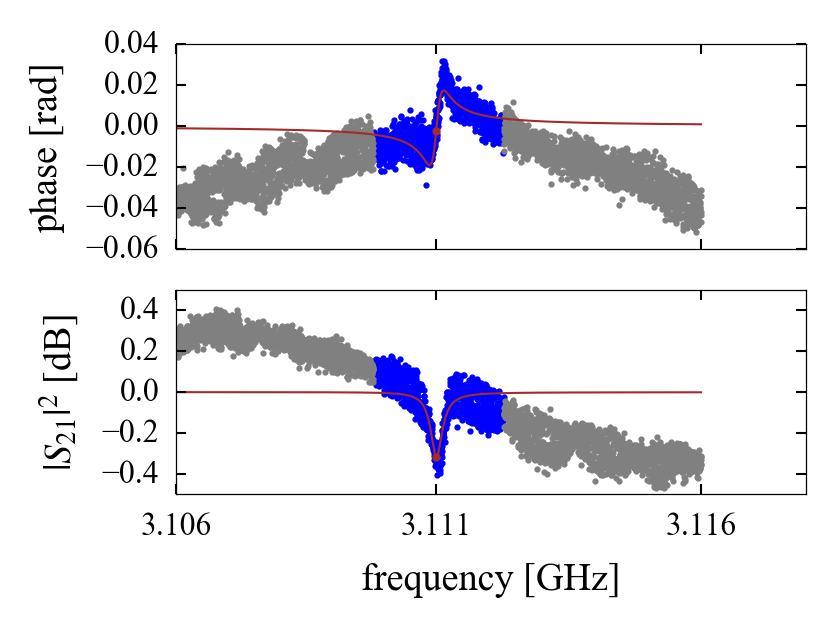

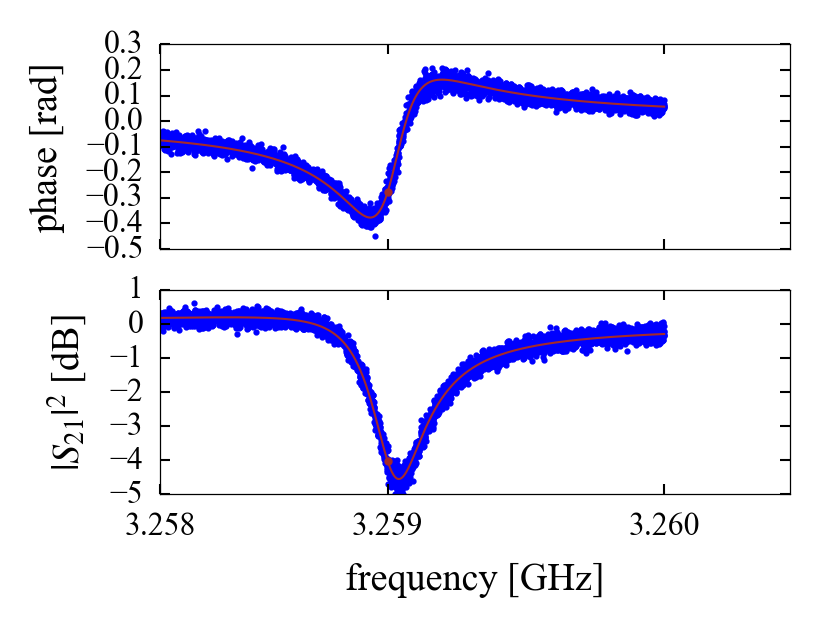

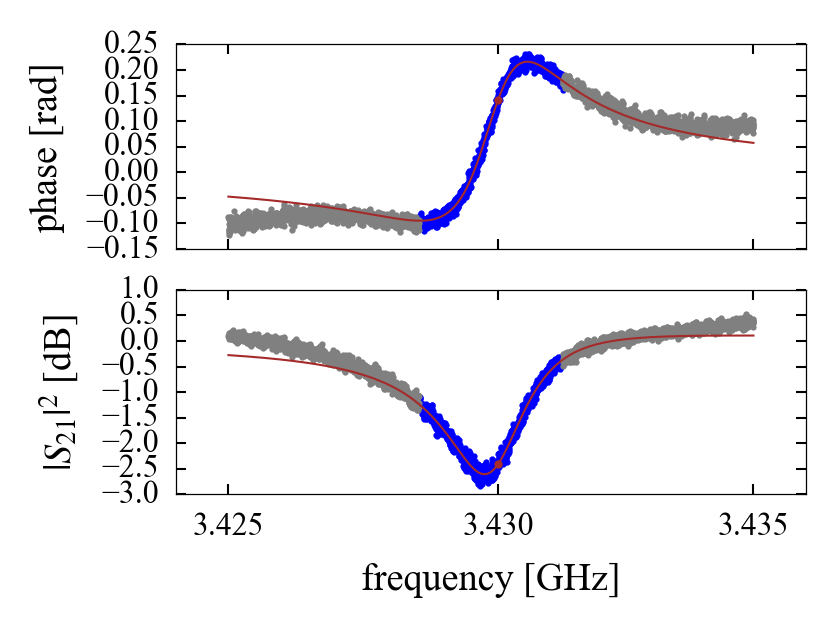

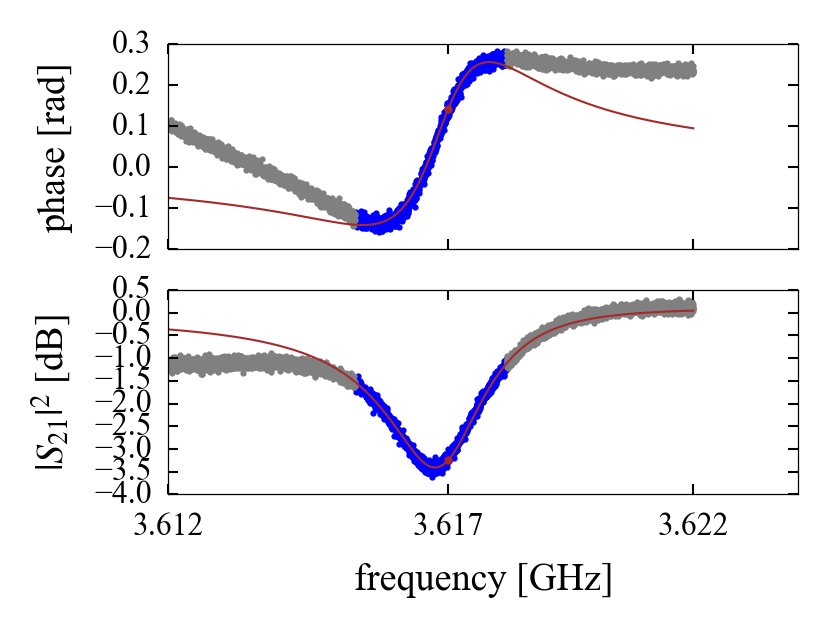

In [11]:
for r in rs_no_mg:
    plot_resonator.amplitude_and_phase(r, normalize_s21=True, freq_scale=1e-9, xlabel='frequency [GHz]')

# Resonator fits: Metglas

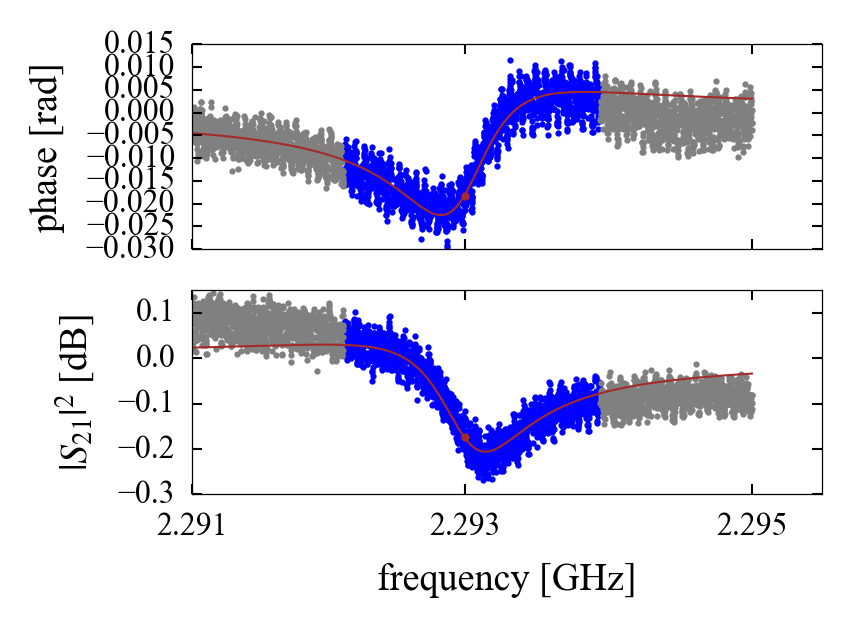

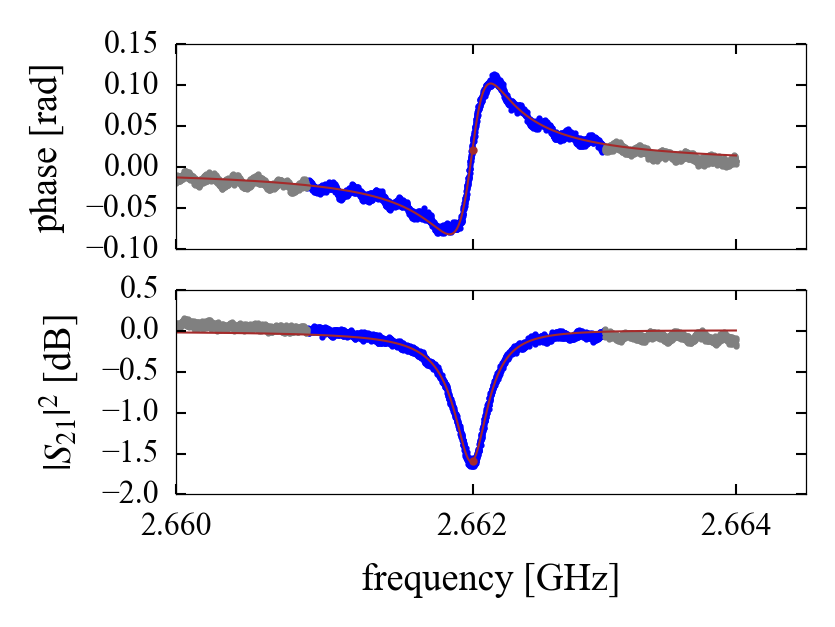

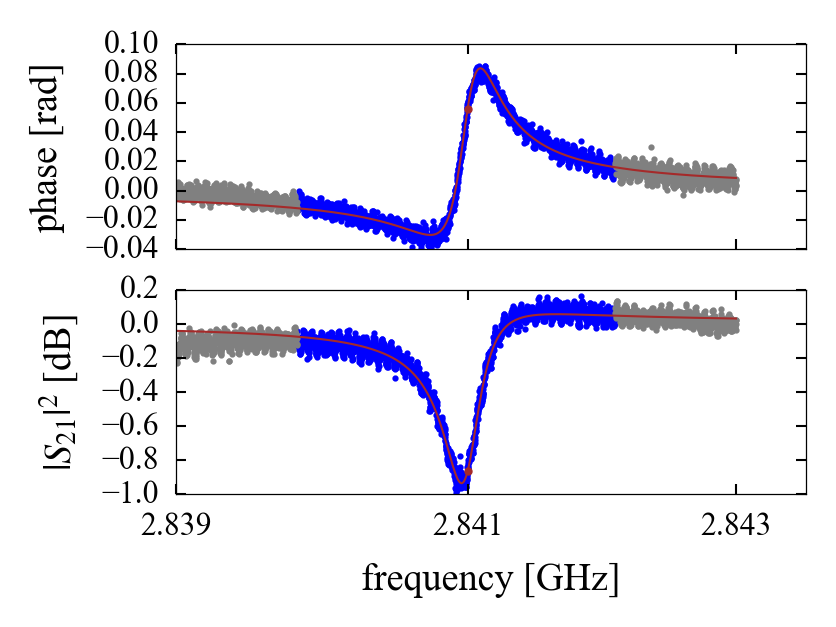

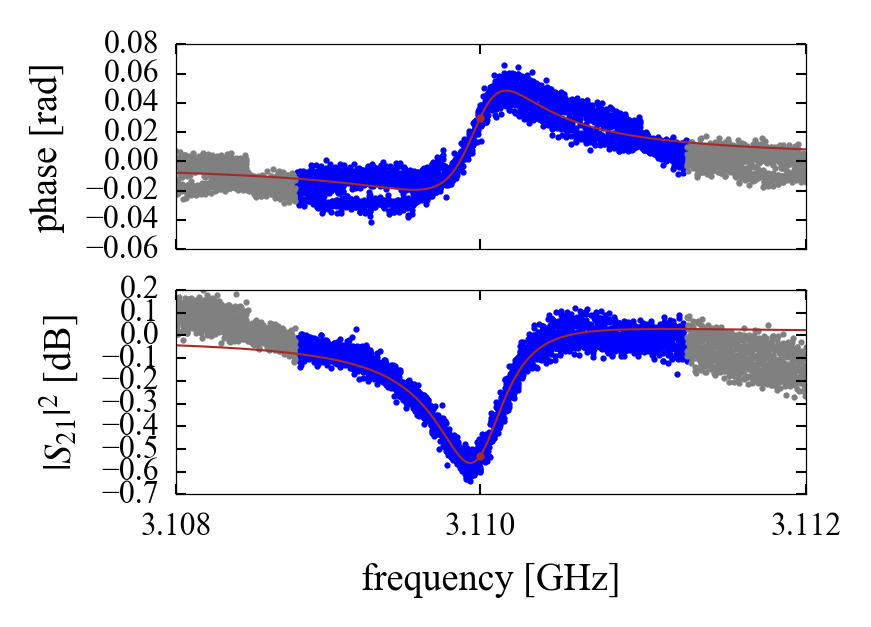

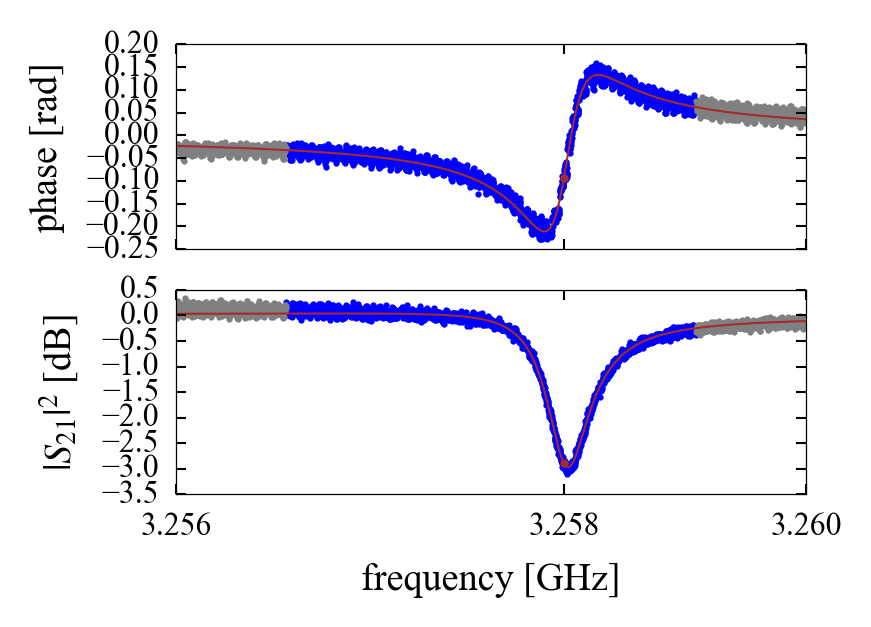

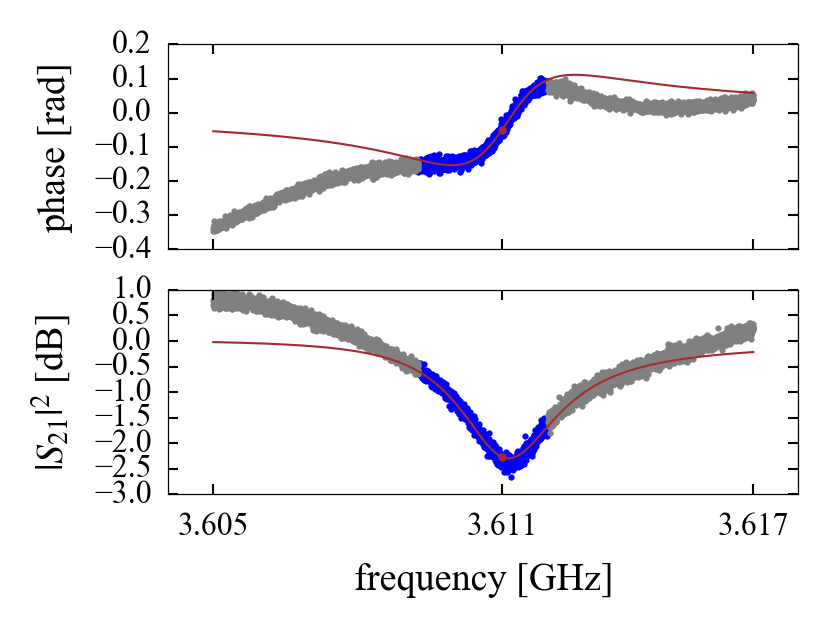

In [12]:
for r in rs_mg_175:
    plot_resonator.amplitude_and_phase(r, normalize_s21=True, freq_scale=1e-9, xlabel='frequency [GHz]')

# With Metglas: 175 mK vs 195 mK

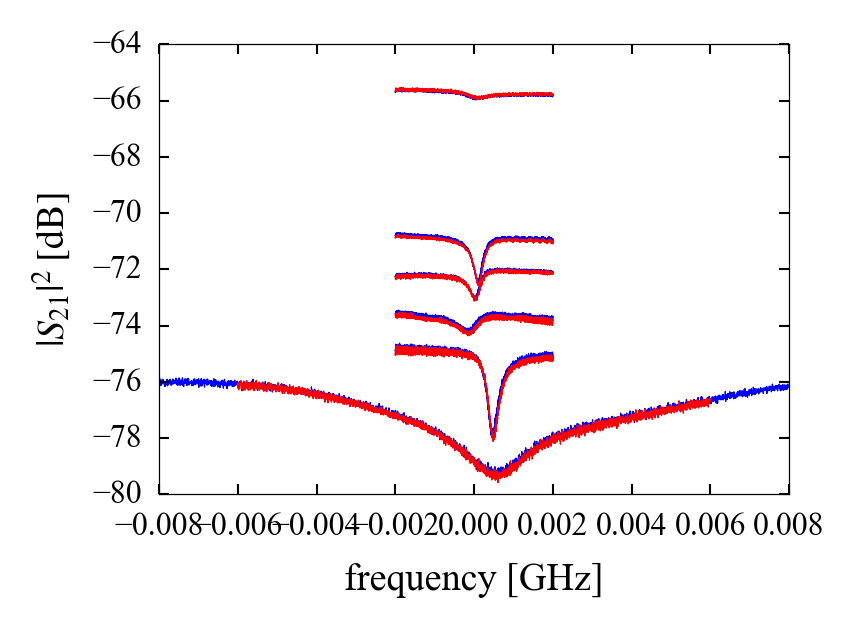

In [13]:
fig, ax = plt.subplots()

for df in mg_195:
    ax.plot(1e-9 * (df.f - df.f.mean()),
            20 * np.log10(np.abs(df.s21)),
            color='blue')

for df in mg_175:
    ax.plot(1e-9 * (df.f - df.f.mean()),
            20 * np.log10(np.abs(df.s21)),
            color='red')
    
ax.set_xlabel('frequency [GHz]')
ax.set_ylabel(r'$|S_{21}|^2 \; [\mathrm{dB}]$');